

---

##  Isometrias no Plano via Matrizes

### **Objetivo**

Explorar as principais **isometrias no plano**  — **rotação**, **reflexão**, **translação** e **composições** — utilizando **representações matriciais** e verificando suas propriedades geométricas por meio de código e visualização gráfica.

---



Considere o triângulo  $ABC$ , com vértices definidos por:

*  A = (1, 1)
*  B = (3, 1)
*  C = (2, 3)

Represente o triângulo como uma matriz, onde cada **coluna** é um ponto:


T=
$\begin{bmatrix}
1 & 3 & 2 \\
1 & 1 & 3
\end{bmatrix}$



 Escreva as **matrizes** das seguintes transformações:

   a) **Reflexão** em relação ao eixo $x$

   b) **Reflexão** em relação à reta $y = x$

   c) **Rotação** no sentido anti-horário em torno da origem por um ângulo genérico $\theta$ (em graus)

Dica: use a fórmula

  $R_\theta = $ $$
\begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{bmatrix}
$$

  

   d) **Translação** pelo vetor $\vec{v} = (2, -1)$

---

##  Aplicações Diretas

 Aplique **individualmente** cada transformação ao triângulo $T$, utilizando:

 Multiplicação de matrizes $T' = A \cdot T$, para isometrias lineares e soma vetorial $T' = A \cdot T + \vec{v}$, quando houver translação

 Visualize (graficamente) o triângulo original e cada triângulo transformado.

---
 Composição de Isometrias

 Considere a seguinte composição de transformações:

   * Primeiro: **rotação** de $\theta = 90^\circ$
   * Depois: **reflexão** no eixo $x$

   a) Escreva a **matriz composta** $M = R_x \cdot R_{90}$

   b) Aplique $M$ ao triângulo $T$ e visualize o resultado.

   c) Interprete geometricamente o efeito da transformação composta. O que ela faz com o triângulo?

 Escolha um valor arbitrário de $\theta$ (por exemplo, $45^\circ$) e repita os passos acima.



# Análise Geométrica

 Após cada isometria ou composição:

   a) As **distâncias** entre os vértices são preservadas?

   b) Os **ângulos** internos permanecem os mesmos?

   Justifique com código ou cálculo. Lembre-se: **isometrias preservam distâncias e ângulos**.

---

##  Desafio Extra

 Implemente uma função que recebe:

   * Um conjunto de pontos $P$
   * Um tipo de isometria
   * Parâmetros (ângulo, vetor de translação, etc.)

   E retorna a imagem transformada $P'$. Use essa função para aplicar sequências arbitrárias de transformações ao triângulo.


##  Matrizes úteis para referência

* **Reflexão sobre o eixo $x$:**
  
 $ R_x = $
  $\begin{bmatrix}
  1 & 0 \\
  0 & -1
  \end{bmatrix}
  $

* **Reflexão na reta $y = x$:**
 $
  R_{y=x} = $
  $\begin{bmatrix}
  0 & 1 \\
  1 & 0
  \end{bmatrix}
  $

* **Rotação de $\theta$ graus anti-horária:**
 $
  R_\theta =$
 $ \begin{bmatrix}
  \cos \theta & -\sin \theta \\
  \sin \theta & \cos \theta
  \end{bmatrix}
  $

* **Translação por vetor $\vec{v} = (a, b)$:**
  $
  T(\vec{x}) = \vec{x} + \vec{v}
  $



Triângulo original T:
[[1 3 2]
 [1 1 3]]


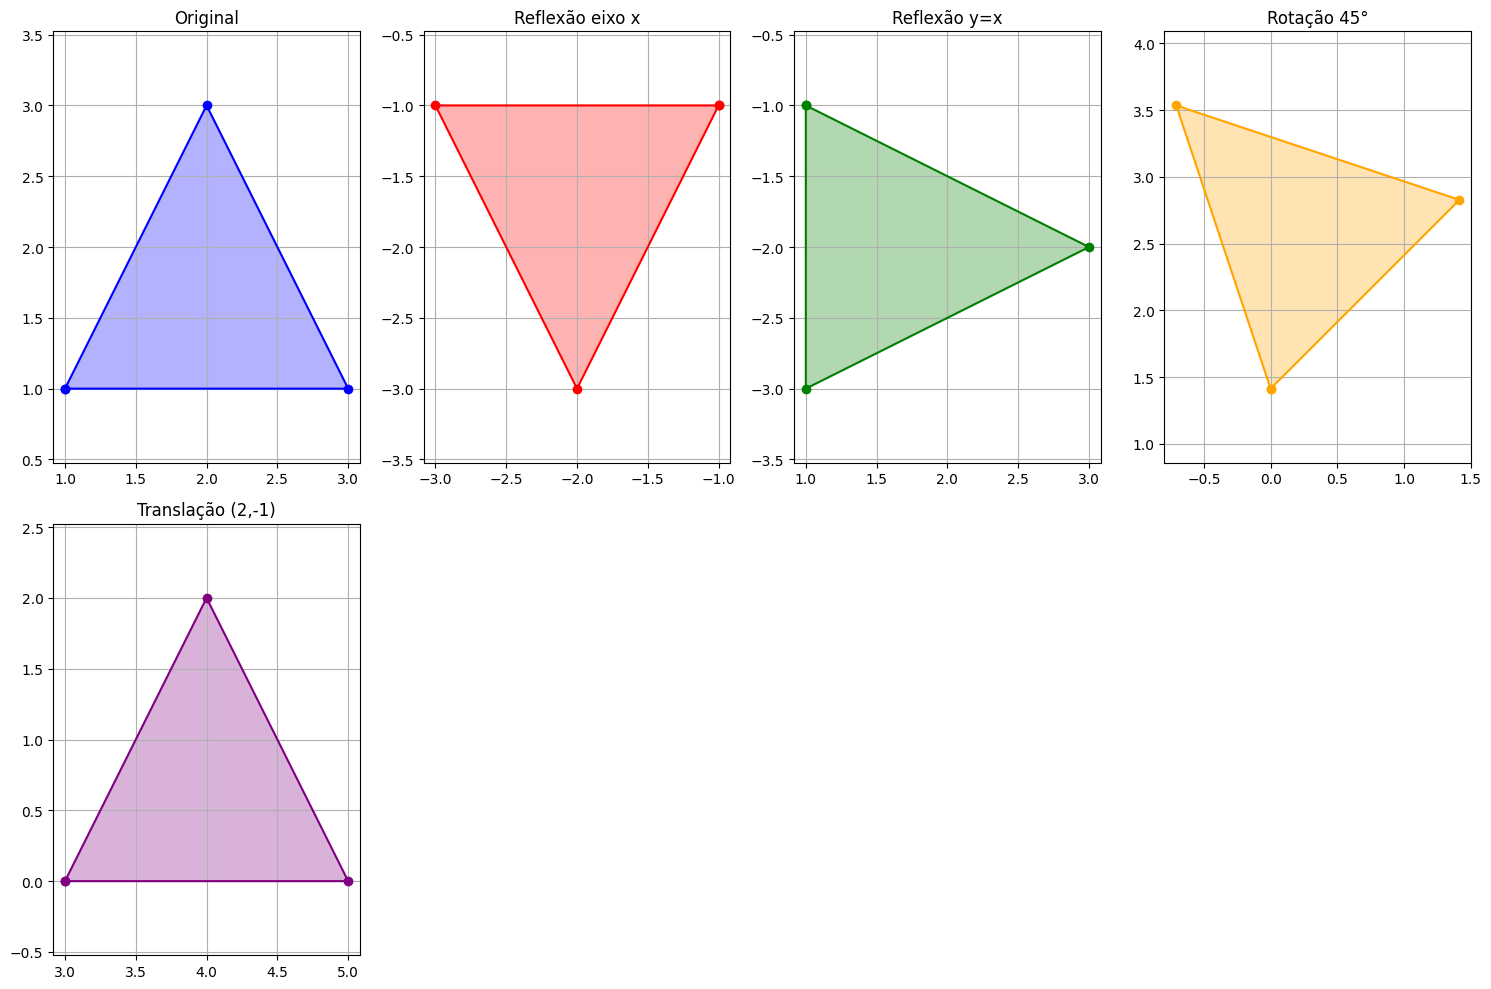


Verificação de preservação de distâncias:
Reflexão eixo x: True
Reflexão y em x: True
Rotação 45°: True
Translação: True


In [1]:
import numpy as np
import matplotlib.pyplot as plt

T = np.array([[1, 3, 2],
              [1, 1, 3]])

print("Triângulo original T:")
print(T)

def matriz_reflexao_eixo_x():
    return np.array([[-1, 0],
                     [0, -1]])
    

def matriz_reflexao_y_igual_x():
    return np.array([[0, 1],
                     [-1, 0]])

def matriz_rotacao(theta_graus):
    theta_rad = np.radians(theta_graus)
    return np.array([[np.cos(theta_rad), -np.sin(theta_rad)],
                     [np.sin(theta_rad), np.cos(theta_rad)]])

R_x = matriz_reflexao_eixo_x()
T_reflexao_x = R_x @ T

R_yx = matriz_reflexao_y_igual_x()
T_reflexao_yx = R_yx @ T

R_45 = matriz_rotacao(45)
T_rotacao_45 = R_45 @ T

T_translacao = T + np.array([[2], [-1]])


def verificar_distancias(T_original, T_transformado):
    dist_orig_AB = np.linalg.norm(T_original[:, 0] - T_original[:, 1])
    dist_orig_BC = np.linalg.norm(T_original[:, 1] - T_original[:, 2])
    dist_orig_CA = np.linalg.norm(T_original[:, 2] - T_original[:, 0])
    
    dist_trans_AB = np.linalg.norm(T_transformado[:, 0] - T_transformado[:, 1])
    dist_trans_BC = np.linalg.norm(T_transformado[:, 1] - T_transformado[:, 2])
    dist_trans_CA = np.linalg.norm(T_transformado[:, 2] - T_transformado[:, 0])
    
    return np.allclose([dist_orig_AB, dist_orig_BC, dist_orig_CA],
                      [dist_trans_AB, dist_trans_BC, dist_trans_CA])

def plot_triangulo(triangulo, titulo, cor='blue'):
    triangulo_fechado = np.hstack([triangulo, triangulo[:, 0:1]])
    plt.plot(triangulo_fechado[0, :], triangulo_fechado[1, :], 'o-', color=cor)
    plt.fill(triangulo_fechado[0, :], triangulo_fechado[1, :], alpha=0.3, color=cor)
    plt.title(titulo)
    plt.grid(True)
    plt.axis('equal')

plt.figure(figsize=(15, 10))

plt.subplot(2, 4, 1)
plot_triangulo(T, 'Original', 'blue')

plt.subplot(2, 4, 2)
plot_triangulo(T_reflexao_x, 'Reflexão eixo x', 'red')

plt.subplot(2, 4, 3)
plot_triangulo(T_reflexao_yx, 'Reflexão y=x', 'green')

plt.subplot(2, 4, 4)
plot_triangulo(T_rotacao_45, 'Rotação 45°', 'orange')

plt.subplot(2, 4, 5)
plot_triangulo(T_translacao, 'Translação (2,-1)', 'purple')

plt.tight_layout()
plt.show()

print("\nVerificação de preservação de distâncias:")
transformacoes = [
    ("Reflexão eixo x", T_reflexao_x),
    ("Reflexão y em x", T_reflexao_yx),
    ("Rotação 45°", T_rotacao_45),
    ("Translação", T_translacao),
]

for nome, T_transformado in transformacoes:
    preserva = verificar_distancias(T, T_transformado)
    print(f"{nome}: {preserva}")
